# Example – Exploring and understanding data

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# Step 1 – Collecting data

In [2]:
df = pd.read_csv('10 usedcars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
year            150 non-null int64
model           150 non-null object
price           150 non-null int64
mileage         150 non-null int64
color           150 non-null object
transmission    150 non-null object
dtypes: int64(3), object(3)
memory usage: 7.1+ KB


# Step 2 – Exploring numeric variables

In [3]:
#Measuring the central tendency – mean and median
#Measuring spread – quartiles and the fve-number summary
df.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


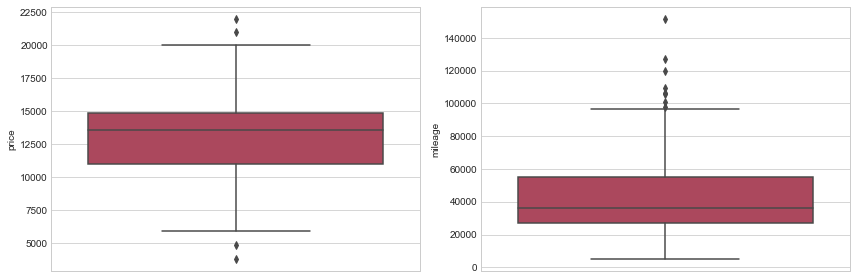

In [12]:
#Visualizing numeric variables – boxplots
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(y='price',data=df,palette='inferno')
plt.subplot(1, 2, 2)
sns.boxplot(y='mileage',data=df,palette='inferno')
plt.tight_layout()

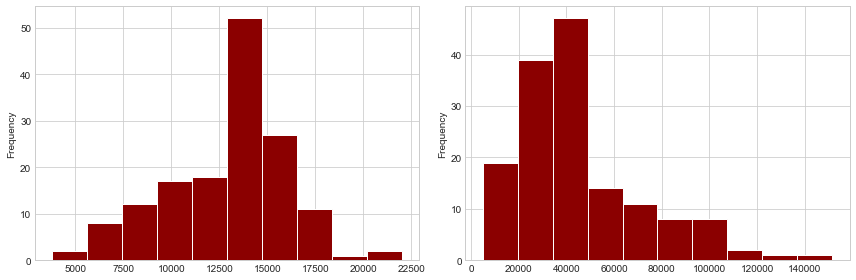

In [13]:
#Visualizing numeric variables – histograms
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
df['price'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.subplot(1, 2, 2)
df['mileage'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.tight_layout()

In [21]:
#Measuring spread – variance and standard deviation
price_mean = df['price'].mean()
price_std  = df['price'].std()
price_var  = df['price'].var()
mileage_mean = df['mileage'].mean()
mileage_std  = df['mileage'].std()
mileage_var  = df['mileage'].var()

print('mean price: '+str(round(price_mean,2)))
print('std price: '+str(round(price_std,2)))
print('var price: '+str(round(price_var,2)))
print('\n')
print('mean mileage: '+str(round(mileage_mean,2)))
print('std mileage: '+str(round(mileage_std,2)))
print('var mileage: '+str(round(mileage_var,2)))

mean price: 12961.93
std price: 3122.48
var price: 9749892.18


mean mileage: 44260.65
std mileage: 26982.1
var mileage: 728033953.64


# Step 3 –  Exploring categorical variables

In [22]:
#Measuring the central tendency – the mode
df.select_dtypes(include=['object']).describe()

,model,color,transmission
count,150,150,150
unique,3,9,2
top,SE,Black,AUTO
freq,78,35,128


# Step 4 – Exploring relationships between variables

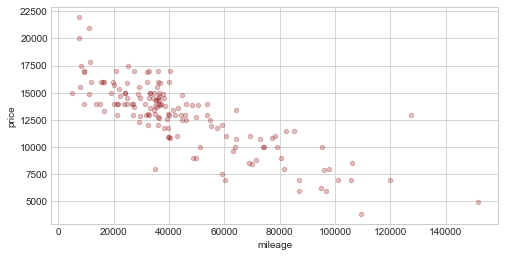

In [26]:
#Visualizing relationships – scatterplots
df.plot.scatter(y='price',x='mileage',color='darkred',alpha=0.25,figsize=(8,4))

In [33]:
#Examining relationships – two-way cross-tabulations
df['conservative'] = df['color'].apply(lambda x: 'YES' if x in ["Black", "Gray", "Silver", "White"] else 'NO')
temp = df.pivot_table(values='year', index=['model'], columns=['conservative'], aggfunc='count')
temp

conservative,NO,YES
model,,
SE,27,51
SEL,7,16
SES,17,32
